<a href="https://colab.research.google.com/github/samkhushal/DSBDA/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading csv file
df = pd.read_csv("Heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
#Finding null values in each column
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.fbs.unique()

array([1, 0], dtype=int64)

In [ ]:
subSet1 = df[['age','cp','chol','thalachh']]

In [ ]:
subSet2 = df[['exng','slp','output']]

In [ ]:
merged_df = subSet1.merge(right=subSet2,how='cross')
merged_df.head()

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,63,3,233,150,0,0,1
2,63,3,233,150,0,2,1
3,63,3,233,150,0,2,1
4,63,3,233,150,1,2,1


In [ ]:
#error correcting
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [ ]:
# Remove outliers for each column using a loop
col_name = ['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
    df[col] = remove_outliers(df[col])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17152\1875963782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = remove_outliers(df[col])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17152\1875963782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = remove_outliers(df[col])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17152\1875963782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

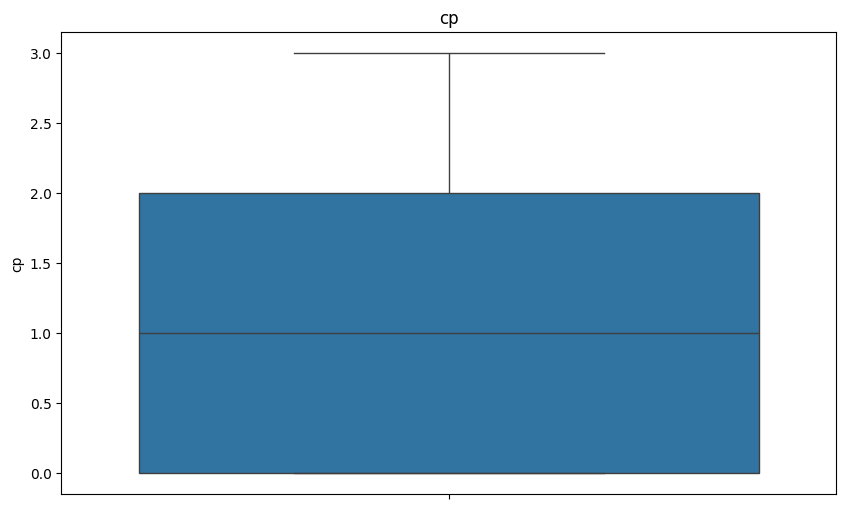

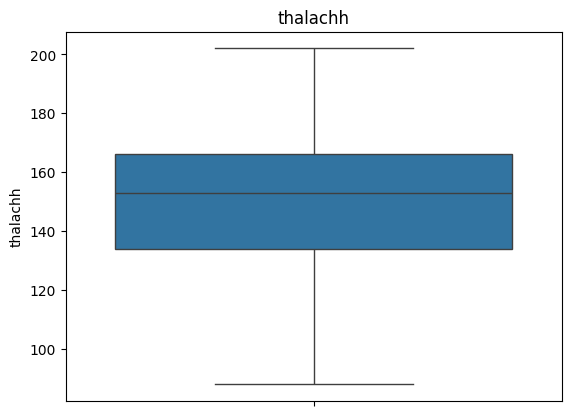

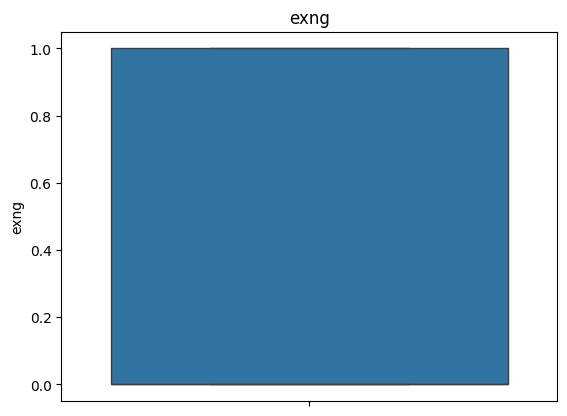

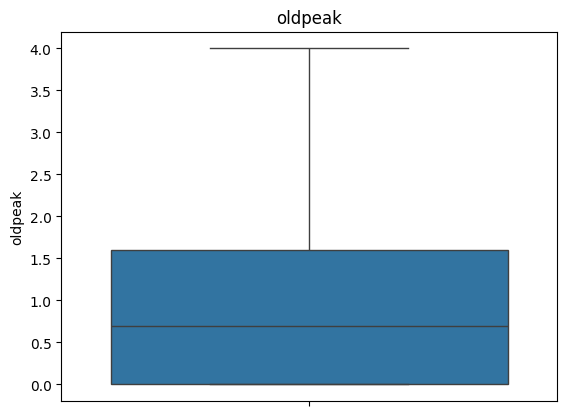

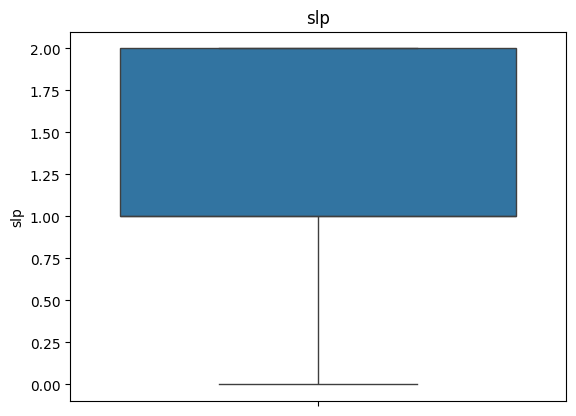

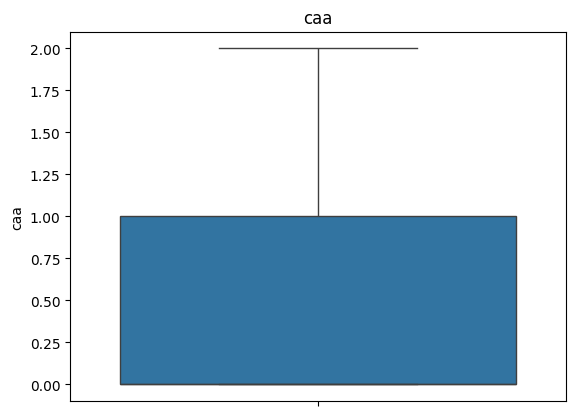

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

In [ ]:
df.dropna()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150.0,0,2.3,0,0.0,1,1
1,37,1,2,130,250,0,1,187.0,0,3.5,0,0.0,2,1
2,41,0,1,130,204,0,0,172.0,0,1.4,2,0.0,2,1
3,56,1,1,120,236,0,1,178.0,0,0.8,2,0.0,2,1
4,57,0,0,120,354,0,1,163.0,1,0.6,2,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123.0,1,0.2,1,0.0,3,0
299,45,1,3,110,264,0,1,132.0,0,1.2,1,0.0,3,0
300,68,1,0,144,193,1,1,141.0,0,3.4,1,2.0,3,0
301,57,1,0,130,131,0,1,115.0,1,1.2,1,1.0,3,0


In [ ]:
df.isna().sum()

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs          0
restecg      0
thalachh     1
exng         0
oldpeak      5
slp          0
caa         24
thall        0
output       0
dtype: int64

In [ ]:
df = df.drop('fbs',axis=1)

Correlation with the Target:
age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
restecg     0.134874
thalachh    0.416569
exng       -0.435601
oldpeak    -0.435009
slp         0.343940
caa        -0.453130
thall      -0.343101
Name: output, dtype: float64



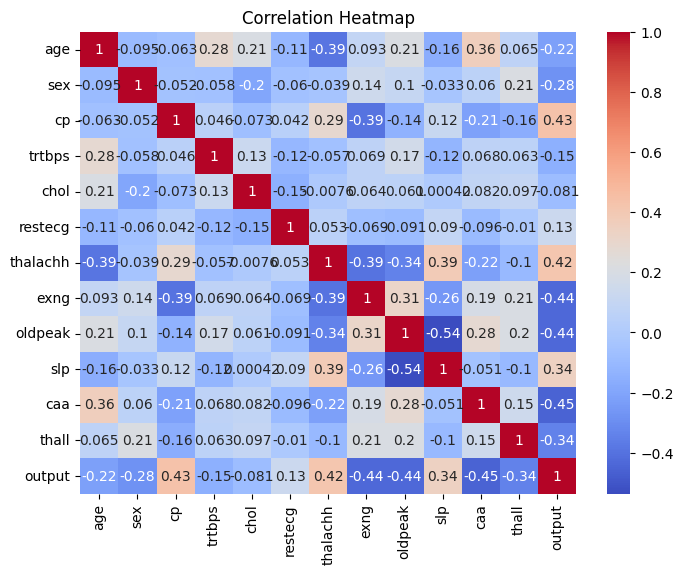

In [ ]:
correlations = df.corr()['output'].drop('output')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# splitting data using train test split
x = df[['cp','thalachh','exng','oldpeak','slp','caa']]
y = df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((241, 6), (61, 6), (241,), (61,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
y_train= np.array(y_train).reshape(-1, 1)
y_test= np.array(y_test).reshape(-1, 1)

In [ ]:
y_train.shape

(241, 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(criterion='entropy')
tc.fit(x_train_scaled,y_train)
y_pred=tc.predict(x_test_scaled)

print("Training Accuracy Score :",accuracy_score(y_pred,y_test))
print("Training Confusion Matrix  :",confusion_matrix(y_pred,y_test))

Training Accuracy Score : 0.7377049180327869
Training Confusion Matrix  : [[20  9]
 [ 7 25]]
